Румянцева Елизавета Ивановна КВБО-01-21

# Задание 1
Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.

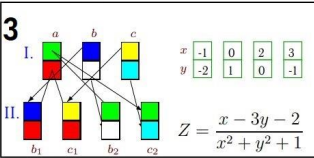

In [11]:
def qZ(x,y):
    return (x-3*y-2)/(x**2+y**2+1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedID):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)]
    X[2]=oldX[sortedID[2]]
    X[3]=oldX[sortedID[2]]
    X[0]=oldX[sortedID[0]]
    X[1]=oldX[sortedID[1]]
    Y[0]=oldY[sortedID[2]]
    Y[1]=oldY[sortedID[2]]
    Y[2]=oldY[sortedID[0]]
    Y[3]=oldY[sortedID[1]]
    return X,Y
def sorting(Z):
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k])
    return sortedId
def evoStep(X,Y,Z):
    _, minId=min((value,id)for (id,value) in enumerate(Z))
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i]) for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X=[-1,0,2,3]
Y=[-2,1,0,-1]
results=evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i+1}_step:{results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:{max(qualityArrZ)}')

max_1_step:-1.6363636363636362
max_2_step:-0.3333333333333335
max_3_step:2.1666666666666665
max_4_step:2.333333333333333
max Z:0.6666666666666666


# Заданиие 2

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.

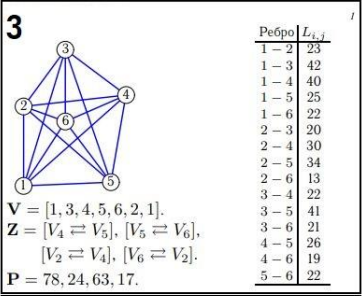

лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
длина лучшего выбранного маршрута: 146
длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


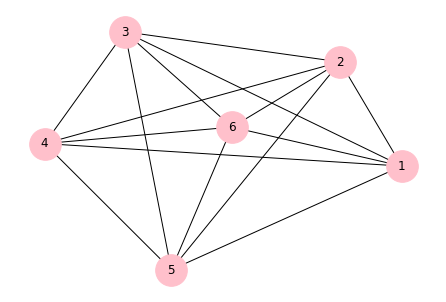

In [16]:
import networkx as nx
from math import e
def probability(delta, T):
    return 100 * e ** (-delta/T)
def reductTemp(prevT):
    return 0.5 * prevT
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j)
                     else -1)for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1)for item in distances])
def routeLength(V,distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV
def routeReplacement(V,Z):
    for z in Z:
        V = routeReplacement(V,z)
    return V
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) 
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)
    return V, arrSum
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range(len(bestRoute)-1):
        for distance in distances:
            if(distance[0]==bestRoute[i] and distance[1]==
               bestRoute[i+1]) or (distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]):
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_circular(graph,node_color='purple',node_size=2000,with_labels=True)
distances=[(1,2,20),(1,3,40),(1,4,42),(1,5,33),(1,6,21),(2,3,26),(2,4,38),(2,5,42),(2,6,17),
           (3,4,22),(3,5,43),(3,6,21),(4,5,27),(4,6,22),(5,6,26)]
V=[1,4,5,2,6,3,1]
Z=[(3,4),(4,6),(5,2),(6,2)]
P=[49,54,43,54]
T=100
graph=nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph,node_color='pink',node_size=1000,with_labels=True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'лучший выбранный маршрут: {bestRoute}')
print(f'длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'длины всех рассмотренных маршрутов: {arrLength}')
task1=arrLength

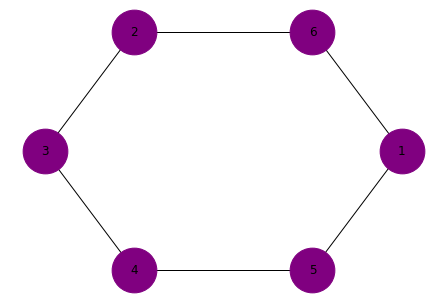

In [13]:
drawRouteGraph(distances, bestRoute)

# Задание 3
На решенном уже примере поэкспериментируйте с показателем S, проанализируйте результаты.

In [30]:
import networkx as nx
from math import e
def probability(delta, T):
    return 100 * e ** (-delta/T)
def reductTemp(prevT):
    return 0.5 * prevT
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j)
                     else -1)for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1)for item in distances])
def routeLength(V,distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV
def routeReplacement(V,Z):
    for z in Z:
        V = routeReplacement(V,z)
    return V
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) 
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)
    return V, arrSum
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range(len(bestRoute)-1):
        for distance in distances:
            if(distance[0]==bestRoute[i] and distance[1]==
               bestRoute[i+1]) or (distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]):
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_circular(graph,node_color='purple',node_size=2000,with_labels=True)
distances=[(1,2,20),(1,3,40),(1,4,42),(1,5,33),(1,6,21),(2,3,26),(2,4,38),(2,5,42),(2,6,17),
           (3,4,22),(3,5,43),(3,6,21),(4,5,27),(4,6,22),(5,6,26)]
V=[1,4,5,2,6,3,1]
Z=[(3,4),(4,6),(5,2),(6,2)]
P1=[49,54,43,54]
P2=[300,300,300,300]
P3=[5,5,5,5]
P4=[50,55,44,55]
T=100
graph=nx.Graph()
graph.add_weighted_edges_from(distances)
bestRoute1, arrLength1 = chooseRoute(distances, V, Z, T, P1)
bestRoute2, arrLength2 = chooseRoute(distances, V, Z, T, P2)
bestRoute3, arrLength3 = chooseRoute(distances, V, Z, T, P3)
bestRoute4, arrLength4 = chooseRoute(distances, V, Z, T, P4)
print("Пункт 1. Параметр неизменный (=49): лучший выбранный маршрут ",bestRoute1,"\n"," "*34,
      "длина лучшего выбранного маршрута: ",routeLength(bestRoute1, distances),"\n"," "*34,
      "длины всех рассмотренных маршрутов ",arrLength1,"\nПункт 2. Параметры увеличены (=300):",
      "лучший выбранный маршрут ",bestRoute2,"\n"," "*34,"длина лучшего выбранного маршрута: ",
      routeLength(bestRoute2, distances),"\n"," "*34,"длины всех рассмотренных маршрутов ",
      arrLength1,"\nПункт 3. Параметры уменьшены (=5): лучший выбранный маршрут ",bestRoute3,"\n",
      " "*34,"длина лучшего выбранного маршрута: ",routeLength(bestRoute3, distances),"\n"," "*34,
      "длины всех рассмотренных маршрутов ",arrLength3,"\nПункт 4. Параметры приближены к",
      "параметрам по условию:","\n"," "*34,"лучший выбранный маршрут",bestRoute3,"\n"," "*34,
      "длина лучшего выбранного маршрута: ",routeLength(bestRoute4, distances),"\n"," "*34,
      "длины всех рассмотренных маршрутов ",arrLength4)

Пункт 1. Параметр неизменный (=49): лучший выбранный маршрут  [1, 6, 2, 3, 4, 5, 1] 
                                    длина лучшего выбранного маршрута:  146 
                                    длины всех рассмотренных маршрутов  [189, 209, 186, 146, 166] 
Пункт 2. Параметры увеличены (=300): лучший выбранный маршрут  [1, 2, 5, 3, 4, 6, 1] 
                                    длина лучшего выбранного маршрута:  170 
                                    длины всех рассмотренных маршрутов  [189, 209, 186, 146, 166] 
Пункт 3. Параметры уменьшены (=5): лучший выбранный маршрут  [1, 5, 2, 3, 4, 6, 1] 
                                    длина лучшего выбранного маршрута:  166 
                                    длины всех рассмотренных маршрутов  [189, 209, 186, 146, 166] 
Пункт 4. Параметры приближены к параметрам по условию: 
                                    лучший выбранный маршрут [1, 5, 2, 3, 4, 6, 1] 
                                    длина лучшего выбранного маршрута:  146 
